In [1]:
from osgeo import gdal

In [108]:
gdal.UseExceptions()

ds1 = gdal.Open('./35_01/srtm_35_01.tif')
ds2 = gdal.Open('./35_02/srtm_35_02.tif')
ds3 = gdal.Open('./36_01/srtm_36_01.tif')
ds4 = gdal.Open('./36_02/srtm_36_02.tif')

gdal_ds = [ds1, ds2, ds3, ds4]
elevations_list = []

# band = ds.GetRasterBand(1)
# elevations_list += [band.ReadAsArray()]

for ds in gdal_ds:
    band = ds.GetRasterBand(1)
    elevations_list += [band.ReadAsArray()]

print(elevations_list)
print(np.shape(elevations_list))

[array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ...,    218,    219,    219],
       [-32768, -32768, -32768, ...,    216,    217,    217],
       [-32768, -32768, -32768, ...,    212,    213,    213]], dtype=int16), array([[-32768, -32768, -32768, ...,    210,    209,    210],
       [-32768, -32768, -32768, ...,    204,    205,    208],
       [-32768, -32768, -32768, ...,    202,    205,    208],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16), array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
   

In [58]:
test = np.array([1, 2])
test

array([1, 2])

In [3]:
import numpy as np

In [4]:
type(elevation[0])

numpy.ndarray

In [5]:
cnt = 0
arr = np.empty([10, 10])

for i in range(10):
    print(elevation[i, :10])
    arr[i] = elevation[i, :10]
    
arr
    

[45 45 45 46 46 45 43 45 44 42]
[46 45 44 45 46 45 45 44 44 42]
[45 43 44 44 45 44 44 43 43 43]
[45 44 44 44 43 44 44 44 42 41]
[47 46 45 45 44 44 44 43 43 42]
[47 46 45 44 44 44 44 43 46 44]
[45 45 44 43 43 43 44 44 44 43]
[43 44 43 43 43 44 43 43 44 44]
[43 43 42 42 42 43 43 44 44 44]
[45 45 44 42 43 43 43 44 44 42]


array([[45., 45., 45., 46., 46., 45., 43., 45., 44., 42.],
       [46., 45., 44., 45., 46., 45., 45., 44., 44., 42.],
       [45., 43., 44., 44., 45., 44., 44., 43., 43., 43.],
       [45., 44., 44., 44., 43., 44., 44., 44., 42., 41.],
       [47., 46., 45., 45., 44., 44., 44., 43., 43., 42.],
       [47., 46., 45., 44., 44., 44., 44., 43., 46., 44.],
       [45., 45., 44., 43., 43., 43., 44., 44., 44., 43.],
       [43., 44., 43., 43., 43., 44., 43., 43., 44., 44.],
       [43., 43., 42., 42., 42., 43., 43., 44., 44., 44.],
       [45., 45., 44., 42., 43., 43., 43., 44., 44., 42.]])

### Get rectangle side length function

In [72]:
def get_pixel_count_to_rounding_and_rect_side(scale):
    # constants
    min_scale = 3
    default_pixel_num = 1200
    overlap_pixel_num = 1
    
    pixel_num_to_rounding = scale / min_scale
    rect_side = default_pixel_num * pixel_num_to_rounding + overlap_pixel_num
    
    return (pixel_num_to_rounding, rect_side)

In [73]:
get_pixel_count_to_rounding_and_rect_side(9)

(3.0, 3601.0)

### Function takes big 2D array and returns smaller 2D array in according to passed sizes

In [74]:
# The function takes big 2D array and returns smaller 2D array in according to passed sizes
# If the function can't satisfy passed sizes of array, it returns array with less sizes
def get_2D_array_from_bigger_2D_array(init_arr, left_border, 
                                        top_border,
                                        tile_size, overlap):
    
    bottom_border = len(init_arr)
    if(bottom_border - top_border > tile_size + overlap):
        bottom_border =  top_border + tile_size + overlap
    right_border = len(init_arr)
    if(right_border - left_border > tile_size + overlap):
        right_border = left_border + tile_size + overlap
        
    res_arr = np.empty([bottom_border - top_border, right_border - left_border])
    
    for i in range(bottom_border - top_border):
        res_arr[i] = init_arr[i, left_border : right_border]
            
    return res_arr
        

In [75]:
temp = get_2D_array_from_bigger_2D_array(elevation, 1200, 2400, 2400, 1)
temp


array([[ -7.,  -6.,  -3., ..., -29., -29., -29.],
       [ -4.,  -4.,  -3., ..., -29., -29., -29.],
       [ -3.,  -4.,  -5., ..., -29., -29., -29.],
       ...,
       [561., 569., 592., ..., -29., -29., -29.],
       [562., 568., 592., ..., -29., -29., -29.],
       [571., 581., 590., ..., -29., -29., -29.]])

In [76]:
temp.shape

(2401, 2401)

### Function returns 2D array combined by equal axis from two 2D arrays

In [77]:
def combine_two_2d_arrays_by_equal_axis(first_arr, second_arr):
    if(first_arr.shape[0] == second_arr.shape[0]):
        return np.hstack((first_arr, second_arr))
    if(first_arr.shape[1] == second_arr.shape[1]):
        return np.vstack((first_arr, second_arr))

In [78]:
arr1 = np.arange(300).reshape(30, 10)
arr2 = np.arange(600).reshape(60, 10)
 
# Concatenating operation
arr = combine_two_2d_arrays_by_equal_axis(arr1, arr2)
arr

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
       [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169

### The function takes four elevation arrays (rectangles) and split top left one in tails with defined size

In [79]:
import math

In [84]:
def split_rect_in_defined_tails(rects, tail_size, left_border, top_border, overlap):
    # Combine all rects to one entire rect
    two_top_combined_rects = combine_two_2d_arrays_by_equal_axis(rects[0], rects[1])
    two_bottom_combined_rects = combine_two_2d_arrays_by_equal_axis(rects[2], rects[3])
    entire_combined_rect = combine_two_2d_arrays_by_equal_axis(two_top_combined_rects, two_bottom_combined_rects)
    
    # Getting size of default rect (6000 px)
    rect_side_size = rects[0].shape[0]
    
    free_h_space = rect_side_size - left_border
    free_v_space = rect_side_size - top_border
    
    
    tails_cnt_in_h_axis = math.ceil(free_h_space / tail_size)
    
    right_shift = tails_cnt_in_h_axis * tail_size - free_h_space
    bottom_shift = tails_cnt_in_h_axis * tail_size - free_v_space
    
    res_tails = []
    
#     v_pos = top_border
#     h_pos = left_border
#     while(v_pos + tail_size < rect_side_size):
#         while(h_pos + tail_size < rect_side_size):
#             res_tails += [get_2D_array_from_bigger_2D_array(rect[0], h_pos, v_pos, tile_size, overlap).tolist()]
#             h_pos += tail_size
            
    for i in range(tails_cnt_in_h_axis):
        for j in range(tails_cnt_in_h_axis):
            res_tails += [get_2D_array_from_bigger_2D_array(entire_combined_rect, left_border + tail_size * j, 
                                                             top_border + tail_size * i, tail_size, overlap)]
        
    return res_tails

In [110]:
tails = split_rect_in_defined_tails(elevations_list, 2400, 0, 0, 1)

tail_idx = 4
print(np.shape(tails))
print(np.shape(tails[tail_idx]))
print(tails[tail_idx])

(9,)
(2401, 2401)
[[-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 ...
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]]


In [52]:
res_tails = []
np_arr = np.ones([12, 12])
np_arr1 = np.zeros([12, 12])
res_tails += [np_arr.tolist()]
res_tails += [np_arr1.tolist()]


res_tails[1]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [38]:
elev_5_1 = np.array_split(elevation, 5, axis=0)
print(np.shape(elev_5_1))
print(elev_5_1)

(5, 1200, 6000)
[array([[    45,     45,     45, ..., -32768, -32768, -32768],
       [    46,     45,     44, ..., -32768, -32768, -32768],
       [    45,     43,     44, ..., -32768, -32768, -32768],
       ...,
       [   113,    113,    113, ..., -32768, -32768, -32768],
       [   111,    114,    113, ..., -32768, -32768, -32768],
       [   113,    116,    115, ..., -32768, -32768, -32768]], dtype=int16), array([[   112,    113,    113, ..., -32768, -32768, -32768],
       [   115,    113,    111, ..., -32768, -32768, -32768],
       [   113,    113,    112, ..., -32768, -32768, -32768],
       ...,
       [   751,    744,    742, ..., -32768, -32768, -32768],
       [   759,    750,    744, ..., -32768, -32768, -32768],
       [   764,    753,    745, ..., -32768, -32768, -32768]], dtype=int16), array([[   773,    759,    751, ..., -32768, -32768, -32768],
       [   787,    767,    758, ..., -32768, -32768, -32768],
       [   787,    773,    766, ..., -32768, -32768, -32768],

In [39]:


elev_5_2  = []
for item in elev_5_1:
    elev_5_1 = np.array_split(item, 5, axis=1)
    elev_5_2 += elev_5_1
    
print(np.shape(elev_5_2))
print(elev_5_2)

(25, 1200, 1200)
[array([[ 45,  45,  45, ...,  -4,  -5,  -6],
       [ 46,  45,  44, ...,  -4,  -4,  -4],
       [ 45,  43,  44, ...,  -4,  -3,  -3],
       ...,
       [113, 113, 113, ...,  21,  22,  23],
       [111, 114, 113, ...,  20,  20,  22],
       [113, 116, 115, ...,  22,  20,  20]], dtype=int16), array([[ -7,  -6,  -3, ..., -28, -26, -24],
       [ -4,  -4,  -3, ..., -27, -25, -24],
       [ -3,  -4,  -5, ..., -27, -26, -25],
       ...,
       [ 23,  22,  22, ..., -22, -22, -22],
       [ 22,  23,  23, ..., -23, -22, -21],
       [ 21,  22,  22, ..., -21, -20, -20]], dtype=int16), array([[-28, -27, -25, ..., -29, -29, -29],
       [-26, -26, -24, ..., -29, -29, -29],
       [-27, -27, -27, ..., -29, -29, -29],
       ...,
       [-22, -23, -21, ..., -29, -29, -29],
       [-20, -20, -20, ..., -29, -29, -29],
       [-20, -20, -20, ..., -29, -29, -29]], dtype=int16), array([[   -29, -32768, -32768, ..., -32768, -32768, -32768],
       [   -29, -32768, -32768, ..., -32768, -3

In [19]:
ar = np.arange(0, 10000)
ar = ar.reshape(100, 100)
ar.shape[0]

100

In [8]:
# !pip install matplotlib

In [96]:
import matplotlib.pyplot as plt

In [97]:
def get_2d_index_by_element_number(nrows, ncols, number):
    element_row = 0
    element_col = 0
    
    while number > ncols:
        number -= ncols
        element_row += 1
    
    element_col = number -1
    
    return (element_row, element_col)

In [98]:
get_2d_index_by_element_number(5, 5, 10)

(1, 4)

In [111]:



def plot_image_grid(images, ncols=None, cmap='gist_earth'):    
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()[:len(imgs)]
    count = 1
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
                
            ax.title.set_text(count)
            
            '''georeferencing section'''
            x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
            # get width and height of image array
            nm_rows, nm_cols = img.shape

            # The shift is one tile side length in degrees. It's should be float value
            shift = 1
            
            two_dim_index = get_2d_index_by_element_number(nrows, ncols, count)
            x0 += shift * (nrows - two_dim_index[0] - 1)
            y0 -= shift * (ncols - two_dim_index[1] - 1)
            x1 = (x0 + dx * nm_cols)
            y1 = (y0 + dy * nm_rows)

            
            ''''''
            #ax.subplots_adjust(hspace=0.4, wspace=0.4)
            ax.imshow(img, cmap=cmap, extent=[y1, y0, x0, x1])
            count += 1


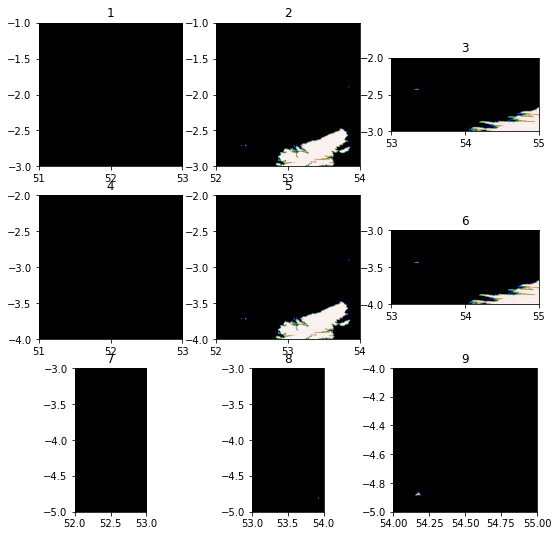

In [115]:
plot_image_grid(tails)

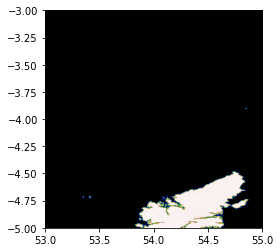

In [114]:
nrows, ncols = np.shape(tails[0])

# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(tails[4], cmap='gist_earth', extent=[y1, y0, x0, x1])
plt.show()

In [34]:
print(dx, dydx, y1)

0.0008333333333333334 0.0 55.0
